# BUILDING SIMPLE CONVOLUTION NEURAL NETWORKS ON DEVANAGARI DATASET

In [1]:
import cv2
import numpy as np
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import initializers

Using TensorFlow backend.


In [2]:
import time
trainx=[]
trainy=[]
diction={}
starttime=time.time()
directory='./DevanagariHandwrittenCharacterDataset/Train'
for index,folder in enumerate(os.listdir(directory)):
    diction[folder]=index
    directoryss = './DevanagariHandwrittenCharacterDataset/Train/'+folder
    for file in os.listdir(directoryss):
        img = cv2.imread(os.path.join(directoryss, file))
        trainx.append(img)
        trainy.append(index) 
    index=index+1   
endtime=time.time()
print("the time took is ",endtime-starttime," seconds")
    

the time took is  155.85854840278625  seconds


In [3]:
import time
testx=[]
testy=[]
starttime=time.time()
directory='./DevanagariHandwrittenCharacterDataset/Test'
for index,folder in enumerate(os.listdir(directory)):
    directoryss = './DevanagariHandwrittenCharacterDataset/Test/'+folder
    for file in os.listdir(directoryss):
        img = cv2.imread(os.path.join(directoryss, file))
        testx.append(img)
        testy.append(index) 
    index=index+1   
endtime=time.time()
print("the time took is ",endtime-starttime," seconds")    

the time took is  32.00905680656433  seconds


In [4]:
trainx=np.array(trainx)
trainy=np.array(trainy)
testx=np.array(testx)
testy=np.array(testy)

In [5]:
trainx = trainx.astype('float32')
testx  = testx.astype('float32')

In [6]:
trainx=trainx/255
testx=testx/255

In [7]:
trainy=trainy.reshape(-1,1)
testy=testy.reshape(-1,1)

In [8]:
import keras
y_train = keras.utils.to_categorical(trainy, 46)
y_test = keras.utils.to_categorical(testy, 46)

In [9]:
from keras.layers import Activation, Dropout, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3),kernel_initializer=initializers.he_normal()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),kernel_initializer=initializers.he_normal()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),kernel_initializer=initializers.he_normal()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,kernel_initializer=initializers.he_normal()))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(46,kernel_initializer=initializers.glorot_normal()))
model.add(Activation('softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
batch_size = 500
epochs = 15
lossinfo=model.fit(trainx,y_train,batch_size=batch_size,epochs=epochs,verbose=2,validation_data=(testx, y_test))

Train on 78200 samples, validate on 13800 samples
Epoch 1/15
 - 192s - loss: 3.1985 - acc: 0.1686 - val_loss: 1.6302 - val_acc: 0.6148
Epoch 2/15
 - 180s - loss: 1.8211 - acc: 0.4595 - val_loss: 0.8614 - val_acc: 0.7875
Epoch 3/15
 - 172s - loss: 1.3183 - acc: 0.5910 - val_loss: 0.5834 - val_acc: 0.8452
Epoch 4/15
 - 171s - loss: 1.0851 - acc: 0.6576 - val_loss: 0.4416 - val_acc: 0.8812
Epoch 5/15
 - 170s - loss: 0.9365 - acc: 0.7021 - val_loss: 0.3625 - val_acc: 0.8996
Epoch 6/15
 - 170s - loss: 0.8405 - acc: 0.7328 - val_loss: 0.3199 - val_acc: 0.9083
Epoch 7/15
 - 170s - loss: 0.7578 - acc: 0.7587 - val_loss: 0.2832 - val_acc: 0.9178
Epoch 8/15
 - 167s - loss: 0.6941 - acc: 0.7752 - val_loss: 0.2521 - val_acc: 0.9274
Epoch 9/15
 - 175s - loss: 0.6365 - acc: 0.7962 - val_loss: 0.2353 - val_acc: 0.9297
Epoch 10/15
 - 176s - loss: 0.5897 - acc: 0.8099 - val_loss: 0.2152 - val_acc: 0.9354
Epoch 11/15
 - 188s - loss: 0.5410 - acc: 0.8251 - val_loss: 0.2075 - val_acc: 0.9385
Epoch 12/15
 

In [12]:
model.save('characterweightsss.h5')

In [13]:
scores = model.evaluate(testx, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 95.25%


# plotting validation vs train accuracy

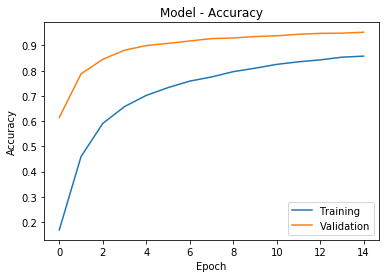

In [18]:
import matplotlib.pyplot as plt
fig1,ax_acc = plt.subplots()
plt.plot(lossinfo.history['acc'])
plt.plot(lossinfo.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()